# Veri Ön İşleme
Bu derste aşağıdaki soruların cevaplarına yoğunlaşacağız.
Veri üzerinde çalışacak bir model inşa etemden önce veriyi tanımamız,düzenlememiz ve işlenebilir hale getirmmiz oldukça önemlidir. Çünkü veri kaynağımız kötü ise, modelimizde verimli çalışmayacaktır. Peki,
Veriyi nasıl tanırız? Veri temizlemek ne demektir?
Eksik veri var mı? Gürültülü (Noisy) veri var mı?Varsa ne yapmamız gerekli?
Aykırı (Outlier) veri var mı? Varsa ne yapmamız gerekli?
Standartlaştırma nedir? Neden ihtiyaç duyuyoruz? (0-1 Dönüşümü-Normalizasyon, z-skor dönüşümü-Standartizasyon,Logaritmik dönüşüm)
Değişken dönüşümleri gerekli mi?(Sürekli değişkenlerin kategorik değişkene, kategorik değişkenlerin sürekli değişkenlere dönüşümü)


# Aykırı Değer (outlier) Tespiti - Anormali tespiti




## Aykırı değer (outlier) nedir?
Wikipedia’nın tanımına göre, diğer gözlemlerden kayda değer derecede uzak olan gözleme aykırı veya uç değer denir. Aykırı gözlemler, veri setinin geri kalanından farklı davranır ve bu nedenle dikkat çeker.

## Aykırı değerler sebepleri

Veri girişi veya ölçüm sırasındaki hatalar.
Verideki bozulmalar
Gerçekten aykırı bir performans gösterimi (Ör: Cristiano Ronaldo, Michael Jordan vs.) veri setinde aykırı değerlere sebep olabilir.
Her aykırı değerin mutlaka hata olmadığınının altını bir kez daha çizmek gerekir. Bazı durumlarda, aykırı gözlemler, veri setindeki yüksek varyansın (değişkenliğin) habercisidir.

## Aykırı değer türleri nelerdir?

#### Nokta aykırı değerler (Point outliers): Bir gözlemin veri setinin geri kalanından farklı olduğu durumlara denir.

Ör: Bir sınıftaki tüm öğrencilerin 40’tan aşağı not alırken, bir öğrencinin 100 alması.
#### Bağlamsal aykırı değerler (Contextual outliers): Bir gözlemin belirli bir bağlam olarak veri setinin geri kalanından farklı olduğu durumlara denir.
Ör: Ekonominin pandemi ile beraber kötüye gitmesi, Yurt genelindeki Özel indirim döneminde satışların yükselmesi.
#### Toplu aykırı değerler (Collective outliers): Veri setindeki bir grup verinin kendi içinde normal, tüm veri seti ile kıyaslandığında aykırı olarak göründüğü durumlara denir.
Ör: Bir mahalledeki tüm sakinlerin aynı anda taşınması.
### Aykırı değerler ayrıca tek değişkenli (univariate) veya çok değişkenli (multivariate) olarak da sınıflandırılabilir. 
Tek değişkenli (univariate) aykırı değerler, tek bir değişkende ortaya çıkarken, çok değişkenli (multivariate) aykırı değerler bir gözlemde en az 2 farklı değişken ile alışılmadık bir kombinasyon olarak ortaya çıkar.

### Aykırı değerler neden sorun yaratır?
Birçok istatistiksel test ve makine öğrenmesi algoritması aykırı değerlere karşı hassastır. Bu nedenle, aykırı gözlemlerin tespit edilip, gözden geçirilmesi ve duruma göre müdahale edilmesi gerekmektedir. Aykırı değerler:

Verilerin dağılımını ve ortalama, medyan vs. gibi veriyi temsil eden istatistikleri etkiler.
Modellerden elde edilen sonuçlara etki eder.
İstatistiksel testlerin gücünü düşürür.

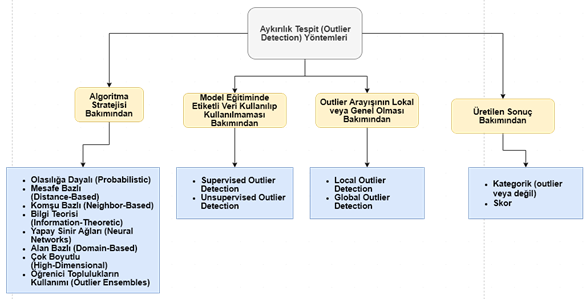


Veri kümesinde yer alan verilerden farklılık gösteren verilere denir. Modellerin öğrenmesini yanıltır.
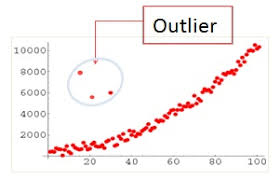
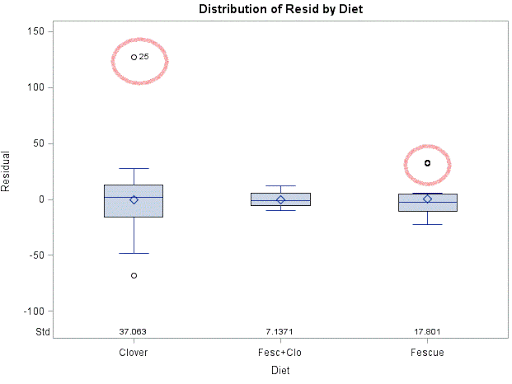

## Aykırı verileri nasıl tespit ederiz?
#### 1)Problemin hitap ettiği kesime  göre tespit edilebilir. 
Örneğin Türkiye için ikinci el araba fiyatlarını tahmin edecek bir model kurmak istiyoruz. Bu veri seti içine Ferrari gibi markların fiyatların dahil edilmesi mantıklı değildir. Edildiği takdirde, modeli yanıltabilir.
### 2) İstatistiki yöntemler kullanarak:
Örneğin elimizdeki verinin ortalaması ve standart sapması bulunur. Bu iki değer kullanılarak bir eşik değer hesaplanır. 
Örneğin eşik değer=ortalama+3xstandart sapma gibi. Bu eşik değerden yüksek olanlar aykırı değerdir denir.
Örnek2: z-skor: 2 maddedeki yönteme benzerdir. ancak bu sefer veriye z-donusumu uygulanır ve veri normalize edilir.
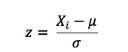
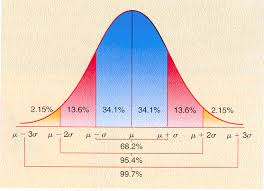
### 3) Grafikler kullanarak : 
Örneğin Kutu grafiği (boxplot): En sık kullanılan yöntemdir. 
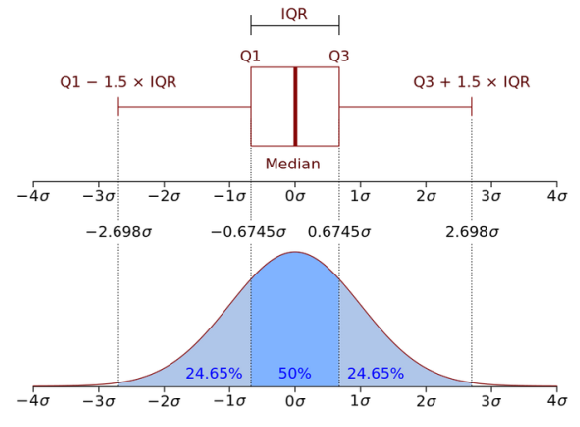
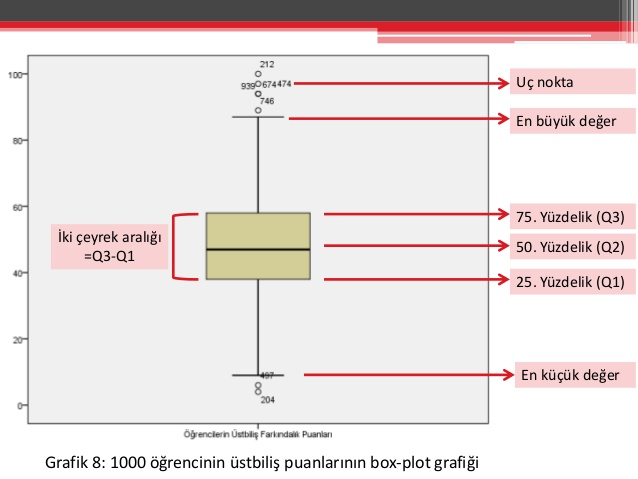


In [1]:
# Ornek : aykırı verileri tespit etmek

In [12]:
import seaborn as sns
#https://github.com/mwaskom/seaborn-data : Seaborn kütüphanesi içinde yer alan verisetlerinin listesi
sns.get_dataset_names()



['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
import pandas as pd
import numpy as np

In [13]:
df2=sns.load_dataset('iris')

In [15]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [11]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
df=sns.load_dataset('iris')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head(20)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
df_sl=df["sepal_length"]
df_sl.head()


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [11]:
df_sl.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [98]:
df["sepal_width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [18]:
sns.boxplot(X=df_sl)

NameError: name 'df_sl' is not defined

<AxesSubplot:ylabel='petal_length'>

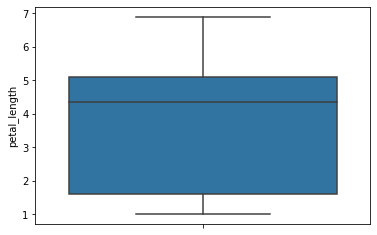

In [21]:
sns.boxplot(y=df["petal_length"])

In [102]:
df_sl.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [22]:
df["sepal_width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

<AxesSubplot:ylabel='sepal_width'>

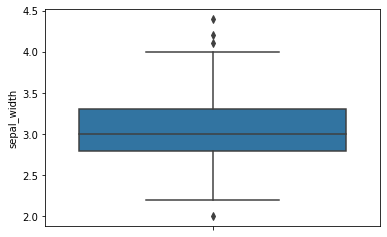

In [13]:
sns.boxplot(y=df["sepal_width"])

<AxesSubplot:xlabel='petal_width'>

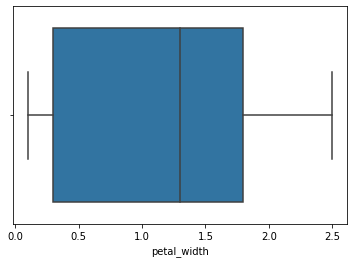

In [14]:
sns.boxplot(x=df["petal_width"])

In [23]:
df=sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [24]:

df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='table'>

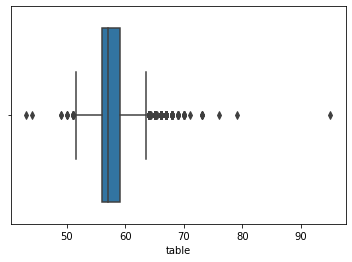

In [25]:
df_table=df["table"]
df_table.head()
sns.boxplot(x=df_table)

In [18]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [19]:
q1=df_table.quantile(0.25)
q2=df_table.quantile(0.50)
q3=df_table.quantile(0.75)

In [8]:
# Aykırı deger icin bir eşik değeri belirleyelim
q1=df_table.quantile(0.25)
q3=df_table.quantile(0.75)
iqr=q3-q1
alt_sinir=q1-1.5*iqr
ust_sinir=q3+1.5*iqr

In [9]:
alt_sinir

51.5

In [10]:
ust_sinir

63.5

In [ ]:
#uc deger var mı, hangi noktalar

In [27]:
(df_table<alt_sinir)|(df_table>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [28]:
outlier_ind=((df_table<alt_sinir)|(df_table>ust_sinir))

In [29]:
outlier_ind

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [30]:
df_table[outlier_ind]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [31]:
df_table[outlier_ind].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [15]:
# Peki bu aykırı degerleri nasıl cozeceğiz
# 1) Silebiliriz: 

In [16]:
import pandas as pd

In [32]:
type(df_table)

pandas.core.series.Series

In [33]:
#seri formunda, data frame cevirelim
df_table=pd.DataFrame(df_table)

In [19]:
df_table.shape

(53940, 1)

In [34]:
df_uygun=df_table[~outlier_ind]

In [35]:
df_uygun.shape

(53335, 1)

In [ ]:
#2)ortalama ile doldurabiliriz

In [36]:
ort=df_table['table'].mean()

In [37]:
ort

57.45718390804603

In [118]:
df_table[outlier_ind]=ort

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_table[outlier_ind]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [119]:
df_table[outlier_ind]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

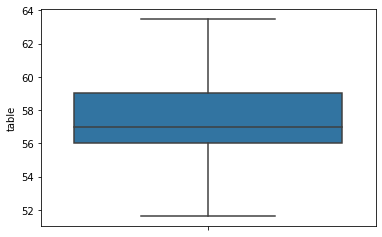

In [120]:
sns.boxplot(y=df_table)

In [ ]:
# 3) Baskılama: alt sınırdan küçük olanları, alt sınıra eşitlemektir.Aynı şekilde üst sınırdan büyük olanalrı da üst sınıra eşitleme işlemidir
# Bunu alıştırma olarak size bırakıyorum.

# LOF (Local Outlier Factor)
##Birden fazla değişkende aykırı değer olduğunda kullanılan yöntem
Verilerin yerel yoğunlukları inceleniyor. daha sonra her bir verinin yerel (local) yogunluğu, komşularınki ile kıyaslanıyor. Komşularına göre daha seyrek bir bölgede bulunan veri, aykırı veri olabilir diye düşünülüyor. LOF her bir veri için bir yogunluk fonksiyonu hesaplar. bu bizim eşik değerimiz oalcak.
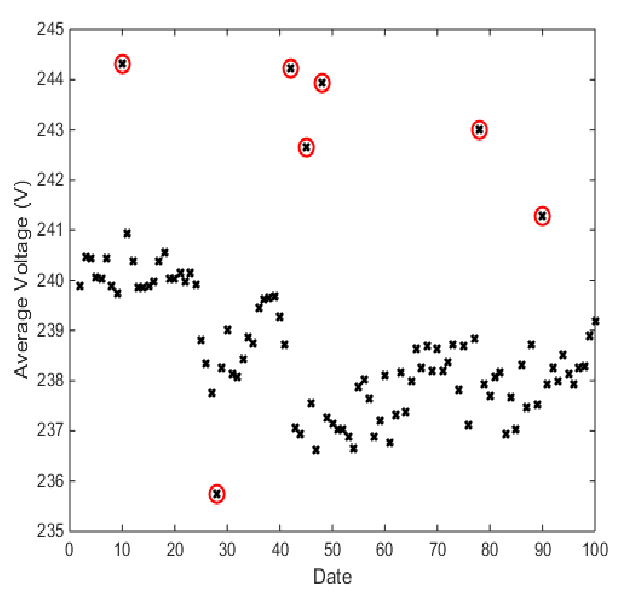

Neden ihtiyac duyuyoruz:
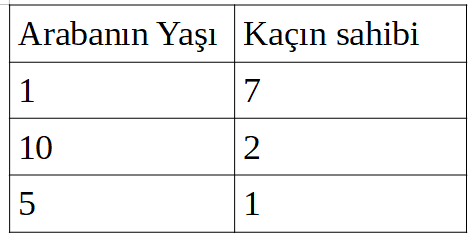

Bazen değişkenler ayrı ayrı ele alındığında aykırılık olmayabilir ama birlilte alındığında aykırı durumlar oluşabilir.

LOF her bir nokta için bir skor üretir. 1’in altındaki bir değer daha yoğun bir bölgeyi gösterirken, 1’den önemli ölçüde daha büyük değerler aykırı değerleri gösterir. 

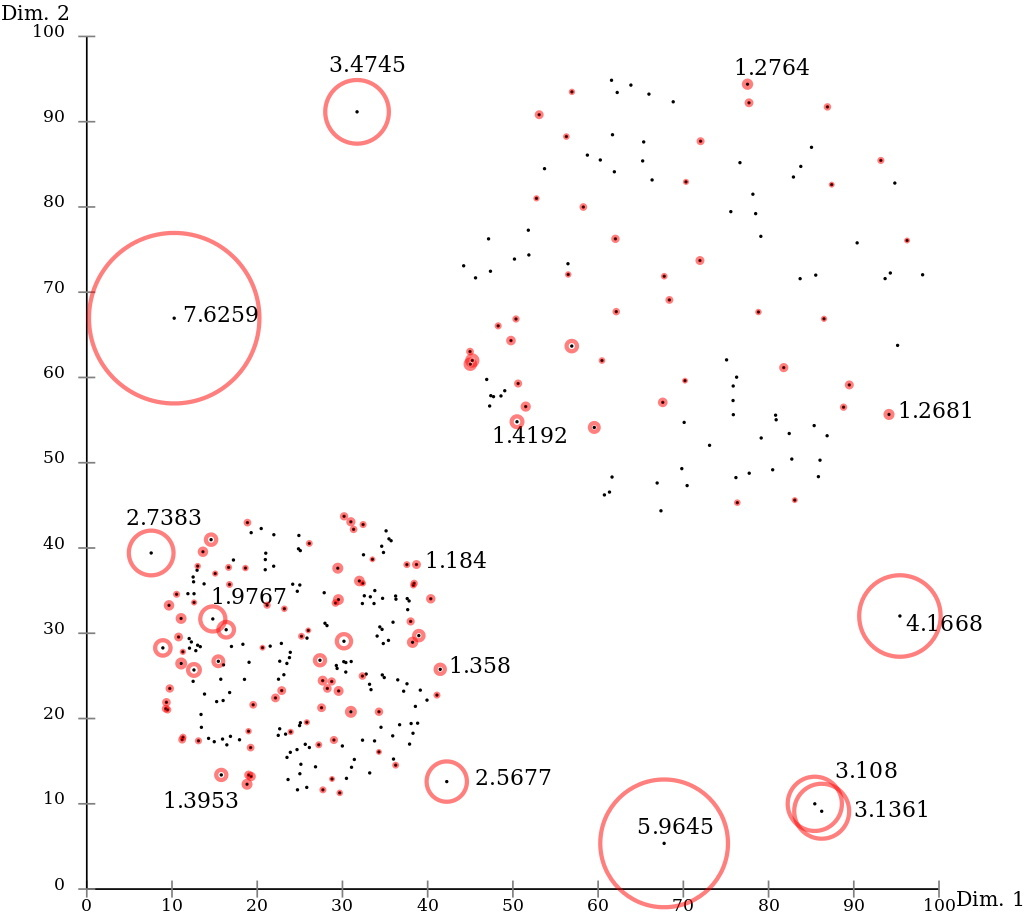

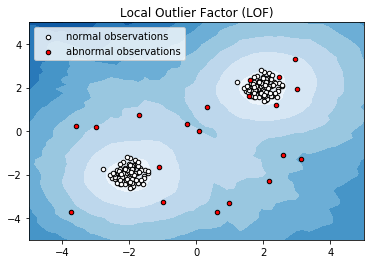

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

In [89]:
y_pred_outliers 

array([-1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [124]:
import seaborn as sns
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [121]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [122]:
LocalOutlierFactor?

In [125]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [128]:
df_scores=clf.negative_outlier_factor_

In [129]:
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [130]:
df[df_scores>-0.95]

,carat,depth,table,price,x,y,z
334,0.71,62.6,58.0,2803,5.70,5.67,3.56
337,0.77,61.3,57.0,2803,5.93,5.88,3.62
341,0.91,62.2,57.0,2803,6.21,6.15,3.85
512,0.71,62.3,58.0,2823,5.71,5.66,3.54
636,0.73,61.4,57.0,2841,5.76,5.80,3.55
...,...,...,...,...,...,...,...
52680,0.59,62.1,57.0,2551,5.37,5.38,3.34
53000,0.70,61.4,57.0,2596,5.69,5.67,3.49
53012,0.70,62.3,57.0,2596,5.68,5.64,3.53
53346,0.57,61.3,56.0,2656,5.32,5.36,3.28


In [131]:
np.sort(df_scores)

array([-8.60430658, -8.20889984, -5.86084355, ..., -0.9162733 ,
       -0.91366494, -0.91247688])

In [48]:
esik_deger=np.sort(df_scores)[10] # farz ettim ki yukardaki sıralı listeyi inceledim ve 10. degerde bir kırılma gözlemledim ve bu değerden küçük olanlar benim için aykırı değerdir dedim.

In [49]:
aykiri_coklu_df=df_scores>esik_deger

In [50]:
yeni_df=df[aykiri_coklu_df]

In [51]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Aykırı değerleri düzeltmek için silme, ortalama , baskılama işlemlerini burası içinde yapabilirim.

# # Eksik Değerler 

# Değişken Standardizasyonu

In [132]:
import numpy as np
import pandas as pd
deg1=np.array([1,3,6,5,7])
deg2=np.array([7,7,5,8,12])
deg3=np.array([6,12,5,6,14])
df_st=pd.DataFrame({"Deg1":deg1,"Deg2":deg2,"Deg3":deg3})
df_st=df_st.astype(float)
df_st
                     

,Deg1,Deg2,Deg3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [53]:
from sklearn import preprocessing

In [133]:
df_st_s=preprocessing.scale(df_st)

In [134]:
df_st_s.std()

1.0

In [135]:
df_st_s.mean()

-1.4802973661668754e-17

In [136]:
df_st

,Deg1,Deg2,Deg3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [57]:
df_st_s

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [79]:
df_st

,Deg1,Deg2,Deg3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [ ]:
#[0-1] arasında Normalizasyon işlemi

In [137]:
df_st_n=preprocessing.normalize(df_st)

In [59]:
df_st

,Deg1,Deg2,Deg3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [121]:
df_st_n

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [122]:
df_st_n.mean()

0.5436983916712558

In [123]:
df_st_n.std()

0.19423025569520116

In [61]:
df_st

,Deg1,Deg2,Deg3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [ ]:
#Min-Max dönüşüm

In [138]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(df_st)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']